## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics <b>to purchase houses at a price below their actual values and flip them on at a higher price.</b> For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build <b>a regression model using regularisation in order to <a style="color:purple">predict the actual value of the prospective properties</a> and decide whether to invest in them or not.</b>

<b>
The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.
    
Also, determine the optimal value of <a style="color:purple">lambda for ridge and lasso regression. </a>
</b>


### Business Goal 

 

1. You are required to <a style="color:purple"> model the price of houses with the available independent variables.</a> 
2. This model will then be used by the management to <a style="color:purple">understand how exactly the prices vary with the variables. </a>
3. They can accordingly manipulate the strategy of the firm and concentrate on <a style="color:purple">areas that will yield high returns.</a> 
4. Further, the model will be a good way for management to <a style="color:purple">understand the pricing dynamics of a new market</a>.

## Step 1 - Importing Libraries

In [1071]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor



## Step 2 - Developing Data Understanding

In [1072]:
df = pd.read_csv('train (1).csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1073]:
df.shape

(1460, 81)

In [1074]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1075]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3 - Cleaning Data

### 3.1. Checking null values

In [1076]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1077]:
# pd.set_option('display.height', 500)
# pd.set_option('display.max_rows', 0)
pd.set_option('display.max_rows', 500)

In [1078]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1079]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<p style='color:purple'>
<b> Observation </b> - A number of columns have blank values. Creating a list of such columns.
    <br>
</p>

In [1080]:
columns_with_null_values = df.columns[df.isna().any()].tolist()

In [1081]:
columns_with_null_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1082]:
len(columns_with_null_values)

19

<p style='color:purple'>
<b> Next Step </b> - Calculating % of null values in each column.
    <br>
</p>

In [1083]:
round((df[columns_with_null_values].isnull().sum()/len(df.index))*100,2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

<p style='color:purple'>
<b> Observation </b> - There are 19 columns with null valuys. Of these, we will drop columns with more than 40% of blank values,
</p>

In [1084]:
len(df.index)

1460

In [1085]:
df[columns_with_null_values].isnull().sum()[round((df[columns_with_null_values].isnull().sum()/len(df.index))*100,2)>40]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [1086]:
print(df.shape)


(1460, 81)


In [1087]:
cols_to_drop = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
cols_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']

In [1088]:
df=df.drop(cols_to_drop,axis=1)
print(df.shape)


(1460, 76)


In [1089]:
# Removing dropped columns from list  
for v in cols_to_drop:
    if v in columns_with_null_values:
        columns_with_null_values.remove(v)  
        
print(len(columns_with_null_values))
print(columns_with_null_values)


14
['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [1090]:
df[columns_with_null_values]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [1091]:
df[columns_with_null_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


### 3.2. Handling null values in continuous variables 

In [1092]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [1093]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].mode()

,LotFrontage,MasVnrArea,GarageYrBlt
0,60.0,0.0,2005.0


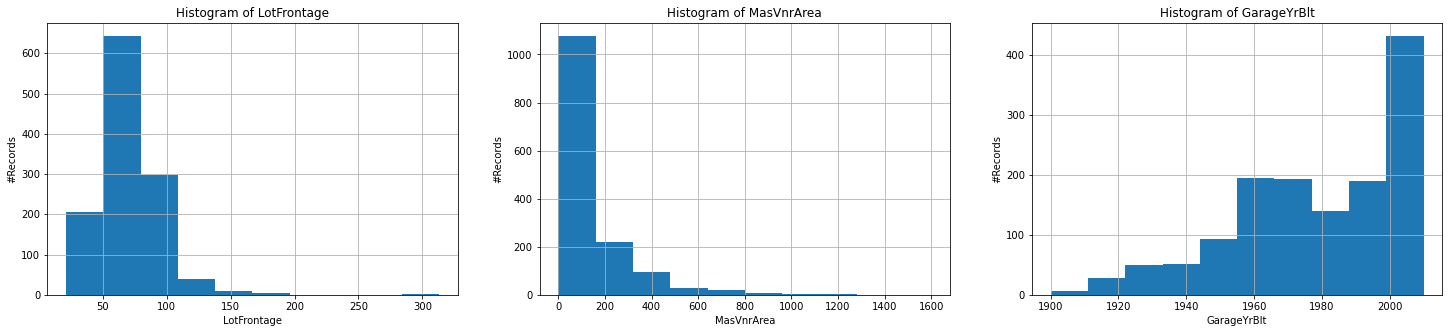

In [1094]:
fig1,ax1 = plt.subplots(ncols=3,nrows=1,sharey=False,figsize=(25, 5), squeeze=False)

LotFrontage = ax1[0][0].hist(df['LotFrontage'])
ax1[0][0].set(xlabel='LotFrontage', ylabel='#Records')
ax1[0][0].set_title('Histogram of LotFrontage')
ax1[0][0].grid(True)

MasVnrArea = ax1[0][1].hist(df['MasVnrArea'])
ax1[0][1].set(xlabel='MasVnrArea', ylabel='#Records')
ax1[0][1].set_title('Histogram of MasVnrArea')
ax1[0][1].grid(True)

GarageYrBlt = ax1[0][2].hist(df['GarageYrBlt'])
ax1[0][2].set(xlabel='GarageYrBlt', ylabel='#Records')
ax1[0][2].set_title('Histogram of GarageYrBlt')
ax1[0][2].grid(True)
plt.show()

In [1095]:
df['LotFrontage'].isnull().sum()

259

In [1096]:
df.LotFrontage = df.LotFrontage.fillna(df['LotFrontage'].median())

In [1097]:
df['LotFrontage'].isnull().sum()

0

In [1098]:
df.MasVnrArea = df.MasVnrArea.fillna(df['MasVnrArea'].median())

In [1099]:
df.GarageYrBlt = df.GarageYrBlt.fillna(df['GarageYrBlt'].median())

### 3.2. Handling null values in categorical variables 

In [1100]:
null_categorical_variables = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
                              ,'Electrical','GarageType','GarageFinish','GarageQual','GarageCond']

null_categorical_variables

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [1101]:
df.isnull().sum()[df.isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [1102]:
for i in null_categorical_variables:
    print(f"\n{i} \n{df[i].value_counts()}")
    print(df[i].mode()[0])


MasVnrType 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None

BsmtQual 
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA

BsmtCond 
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA

BsmtExposure 
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
No

BsmtFinType1 
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf

BsmtFinType2 
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf

Electrical 
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr

GarageType 
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd

GarageFinish 
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Unf

GarageQual 
TA    1311
Fa      48
Gd     

<p style='color:purple'>
<b> Observation </b> - Based on above observations, we will populate the null values in categorical columns with mode values 
</p>

In [1103]:
for i in null_categorical_variables:
    df[i] = df[i].fillna(df[i].mode()[0])


<p style='color:purple'>
<b> Observation </b> - All the null values have been handled. Verifying the same below.
</p>

In [1104]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## Step 4 - Checking target variable



In [1105]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1106]:
df['SalePrice'].mode()

0    140000
dtype: int64

In [1107]:
# df['SalePrice'].quartiles(0.2,0.25)
df['SalePrice'].quantile(np.linspace(.1, 1, 9, 0))

0.1    106475.0
0.2    124000.0
0.3    135500.0
0.4    147000.0
0.5    163000.0
0.6    179280.0
0.7    198620.0
0.8    230000.0
0.9    278000.0
Name: SalePrice, dtype: float64

#### Checking relation of target variable with all continuous variable

In [1108]:

non_object_columns = df.select_dtypes(exclude=['object']).columns
non_object_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1109]:
len(non_object_columns)

38

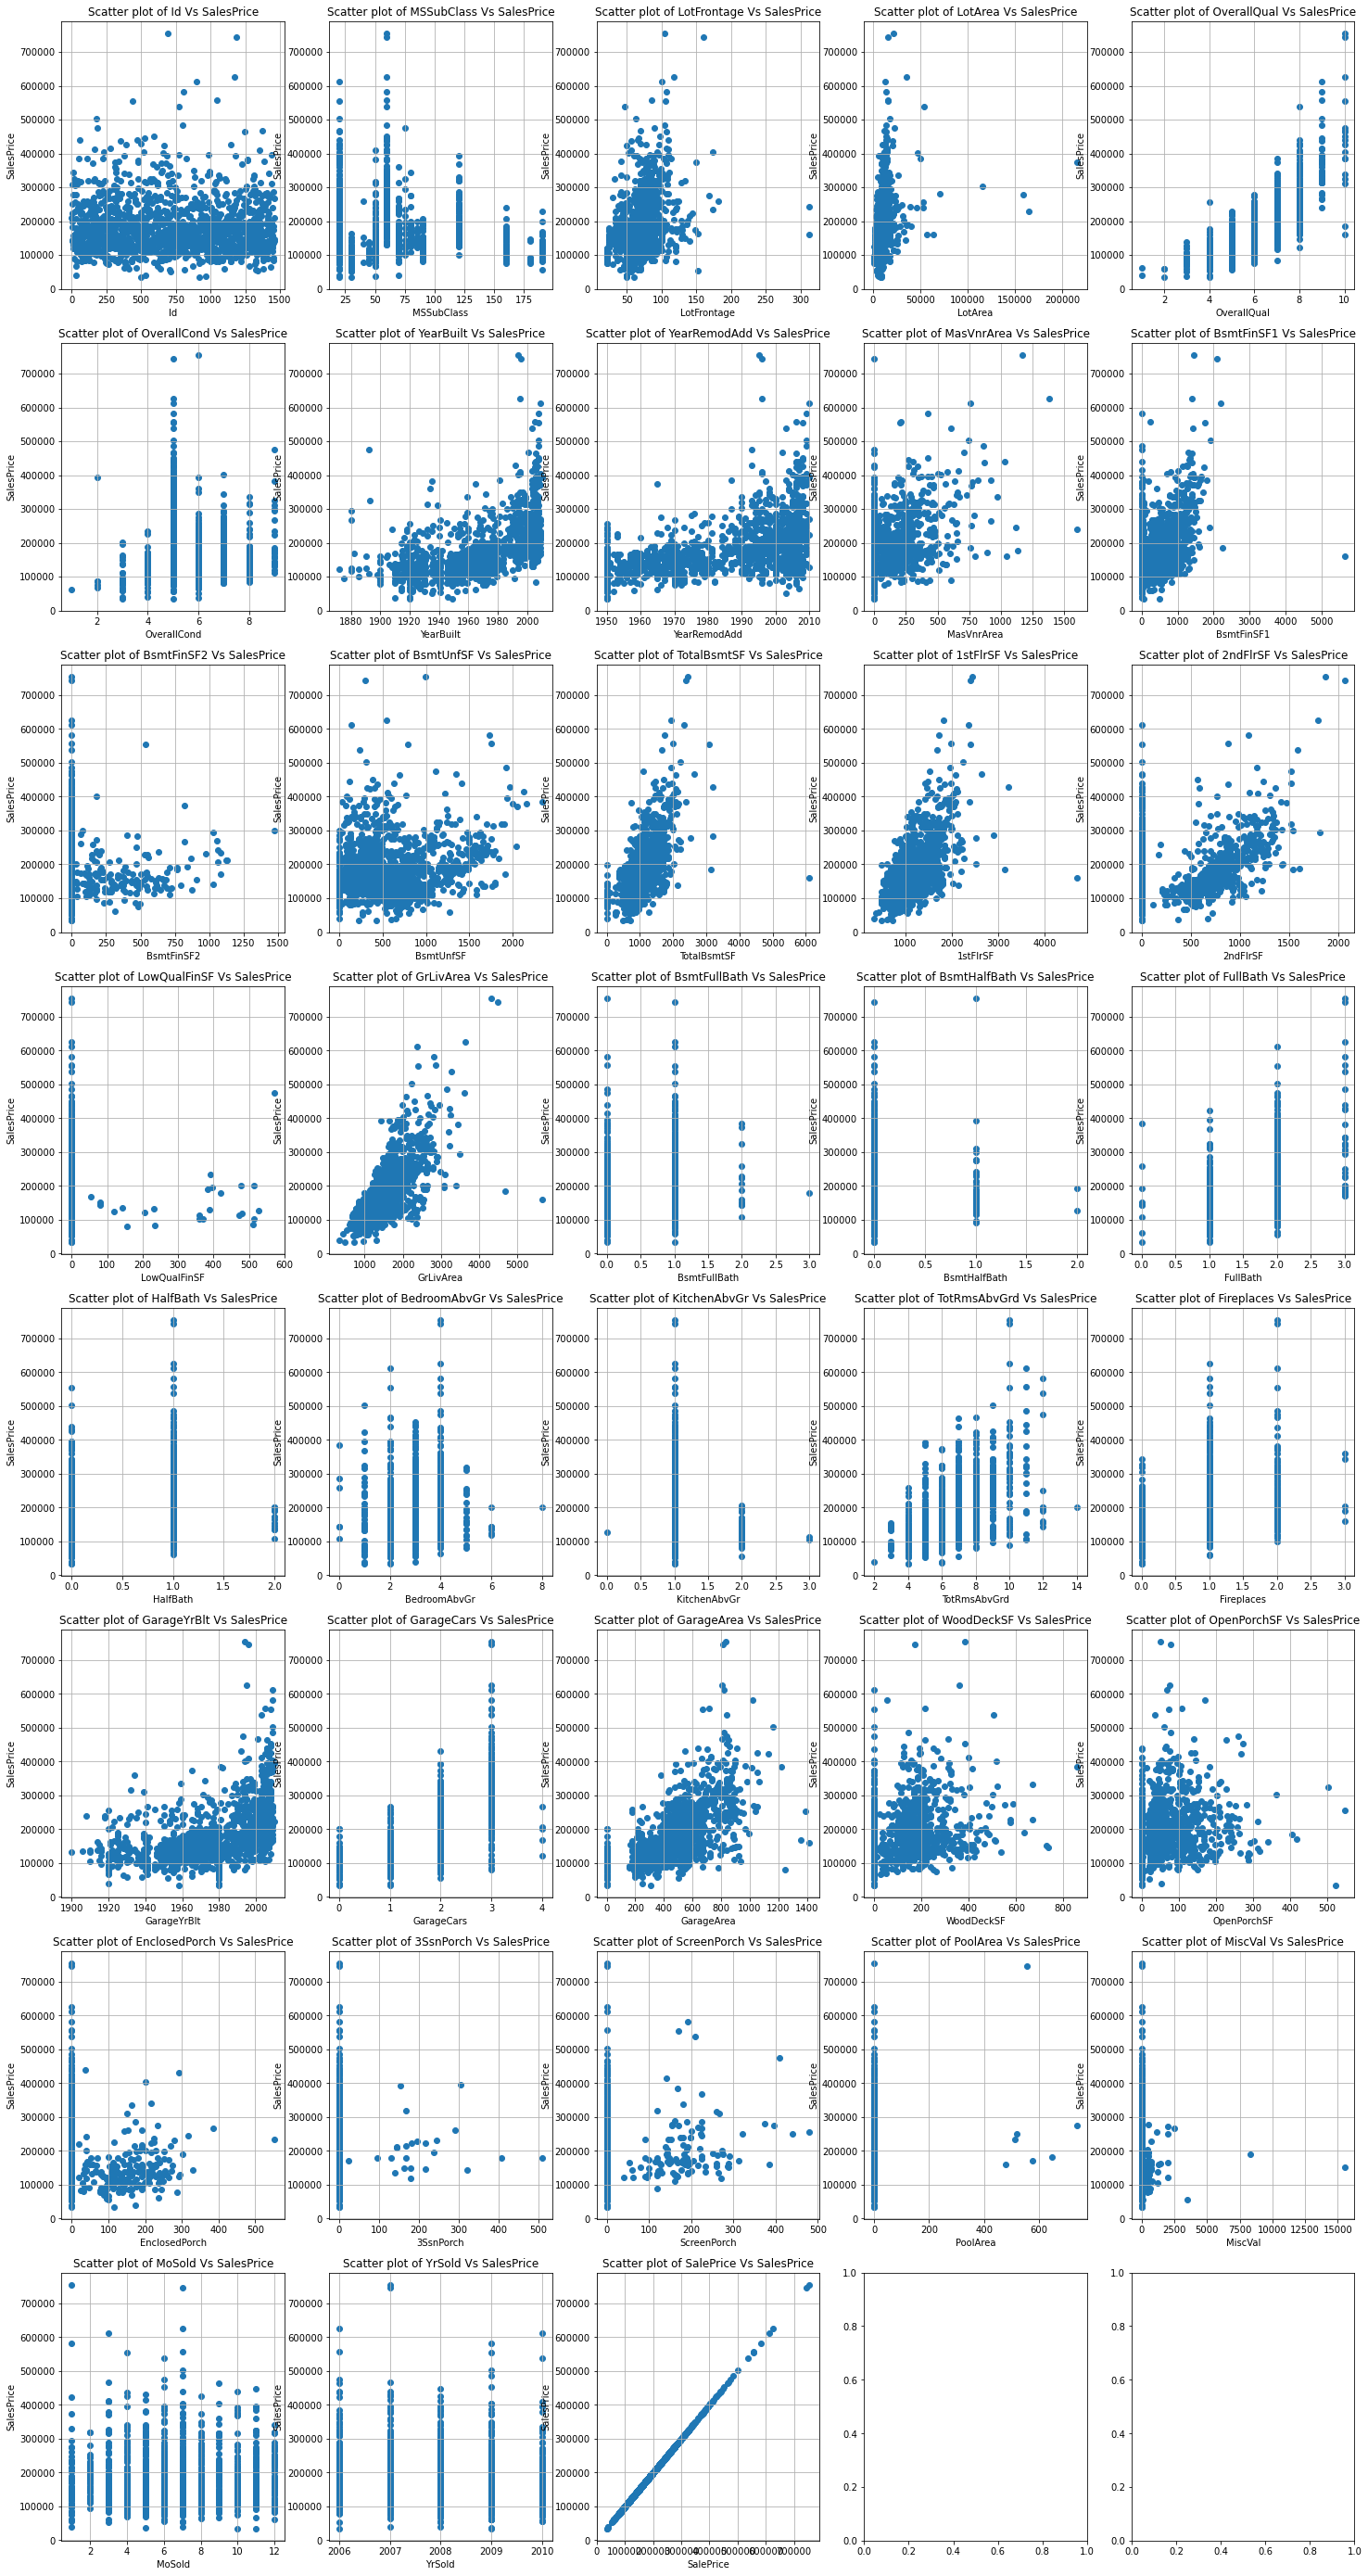

In [1110]:
ncols,nrows=8,5
fig2,ax2 = plt.subplots(nrows=8,ncols=5,sharey=False,figsize=(25, 50), squeeze=False)

for i,j in enumerate(non_object_columns):
    r,c = i//nrows,i%nrows
    ax2[r][c].scatter(data=df,x=j,y='SalePrice')
    ax2[r][c].set(xlabel=j, ylabel='SalesPrice')
    ax2[r][c].set_title(f"Scatter plot of {j} Vs SalesPrice")      
    ax2[r][c].grid(True)



#### Checking relation of target variable with all categorical variable

In [1111]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1112]:
len(object_columns)

38

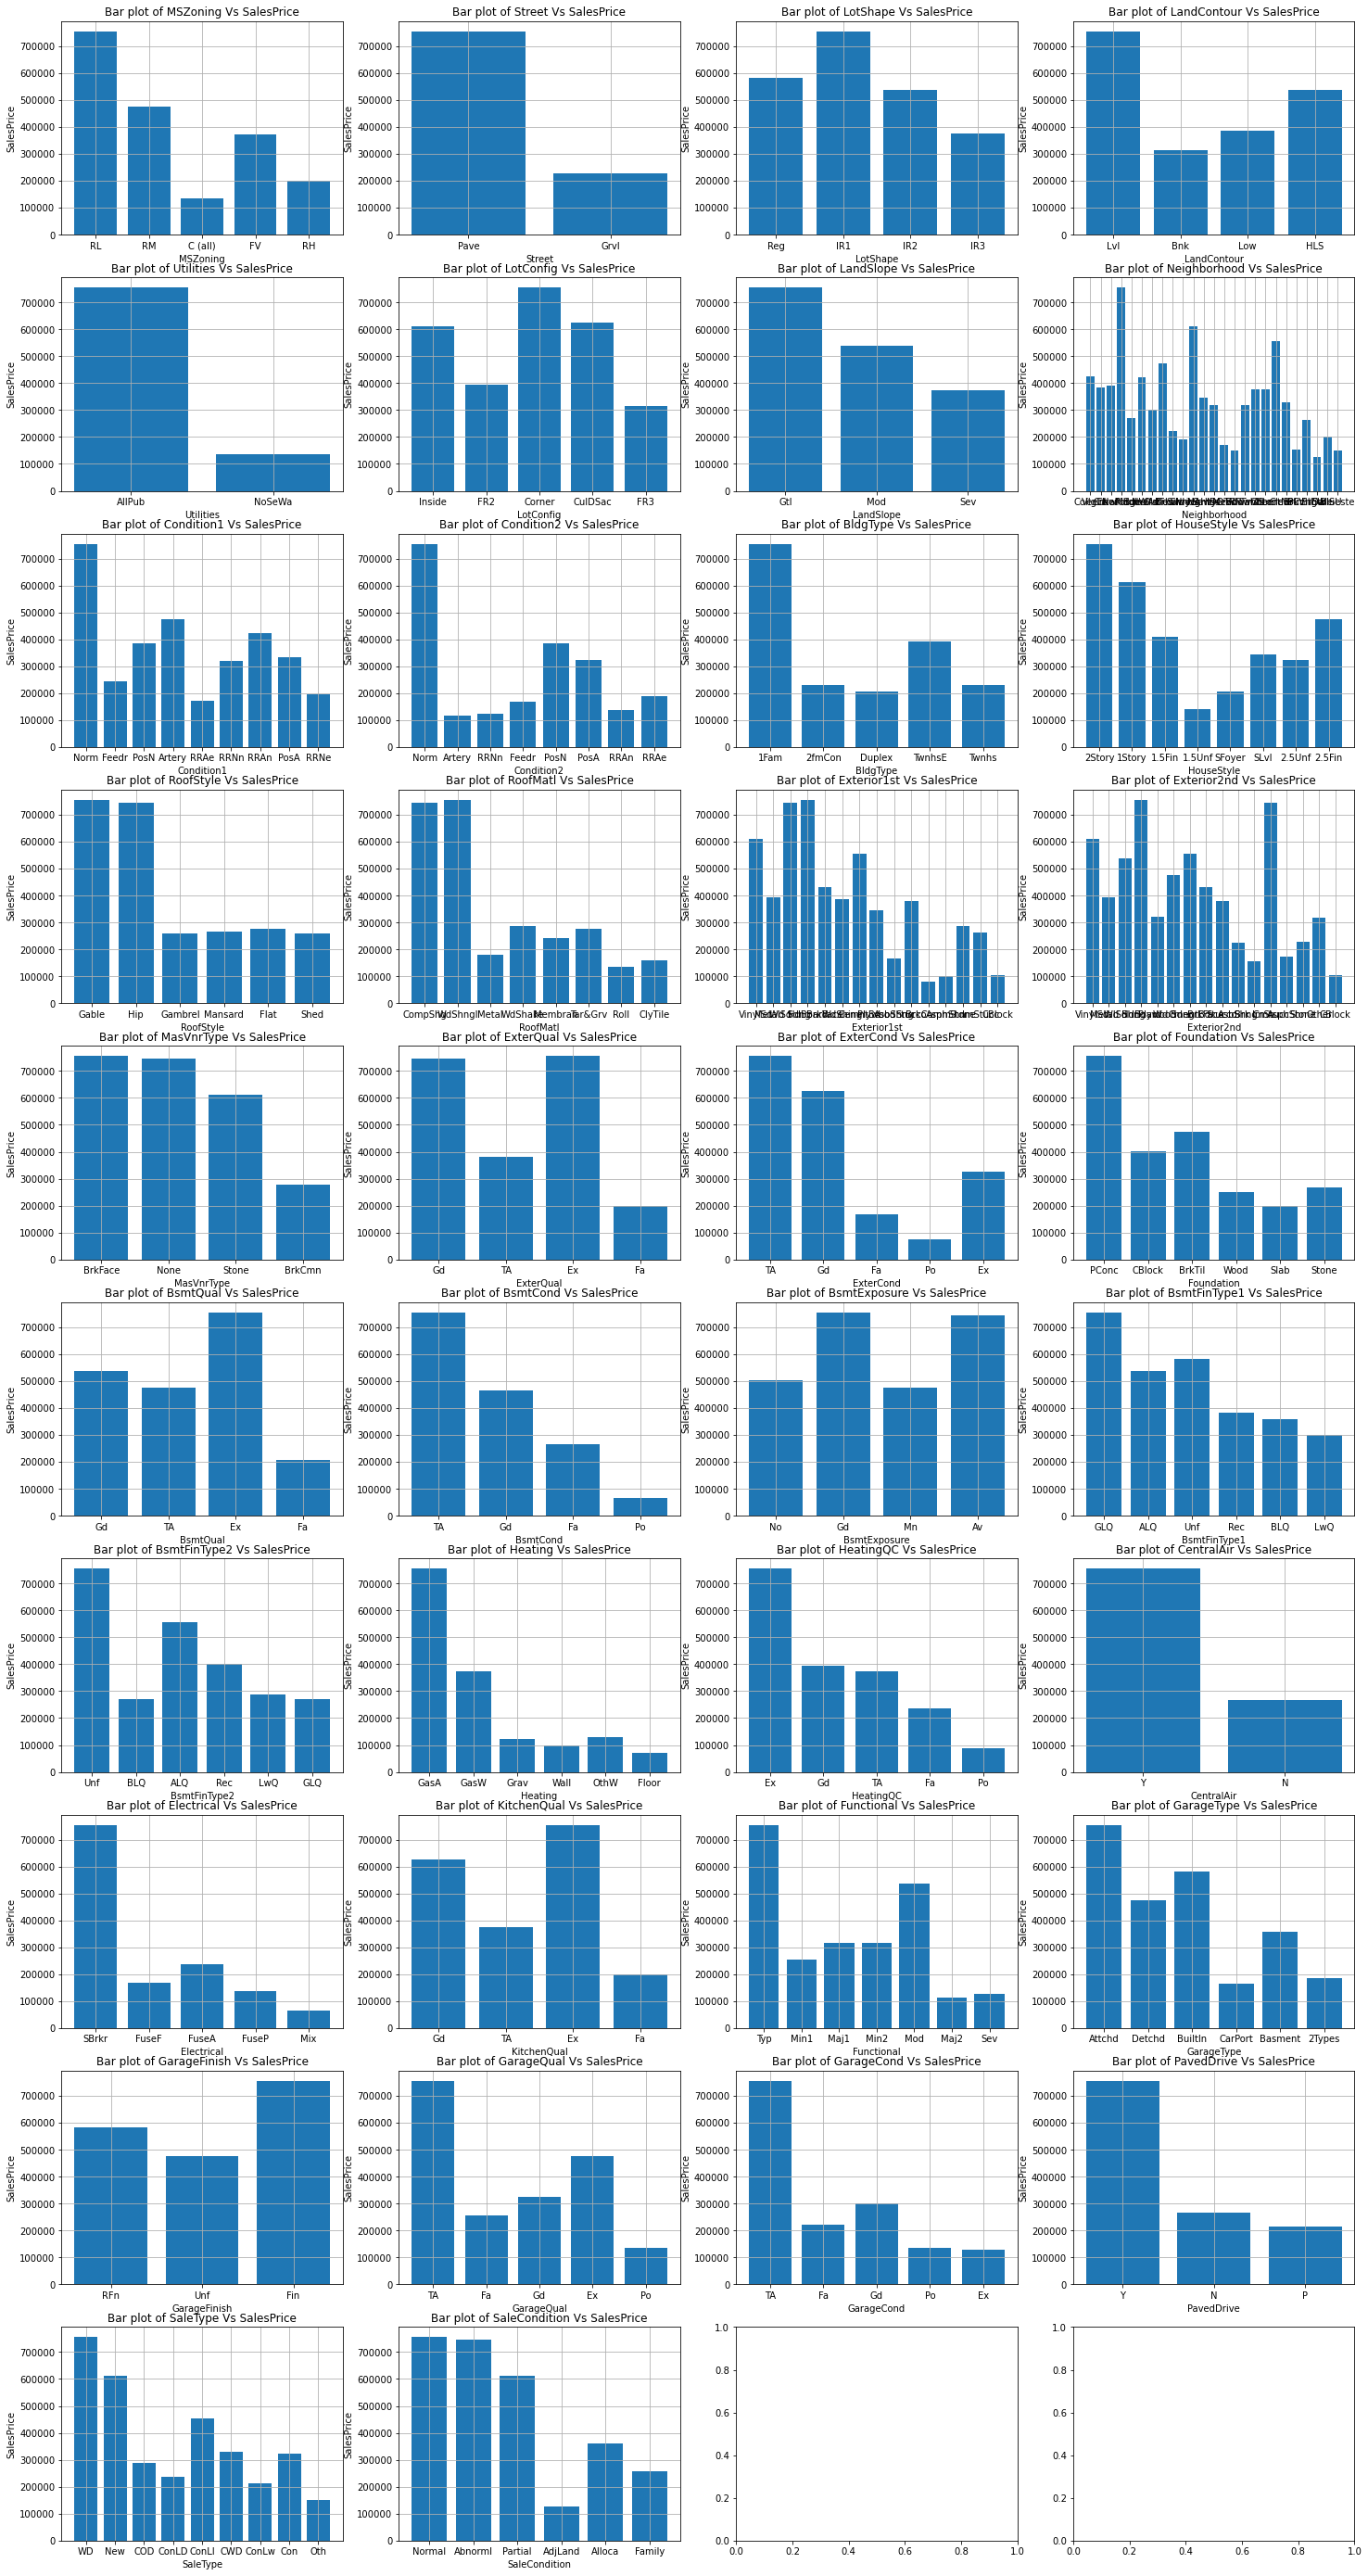

In [1113]:
ncols,nrows=10,4
fig3,ax3 = plt.subplots(nrows=10,ncols=4,sharey=False,figsize=(25, 50), squeeze=False)

for i,j in enumerate(object_columns):
    r,c = i//nrows,i%nrows
    ax3[r][c].bar(x=df[j],height=df['SalePrice'])
    ax3[r][c].set(xlabel=j, ylabel='SalesPrice')
    ax3[r][c].set_title(f"Bar plot of {j} Vs SalesPrice")
    ax3[r][c].grid(True)


## Step 5 - Checking for outliers

In Continuous Variables

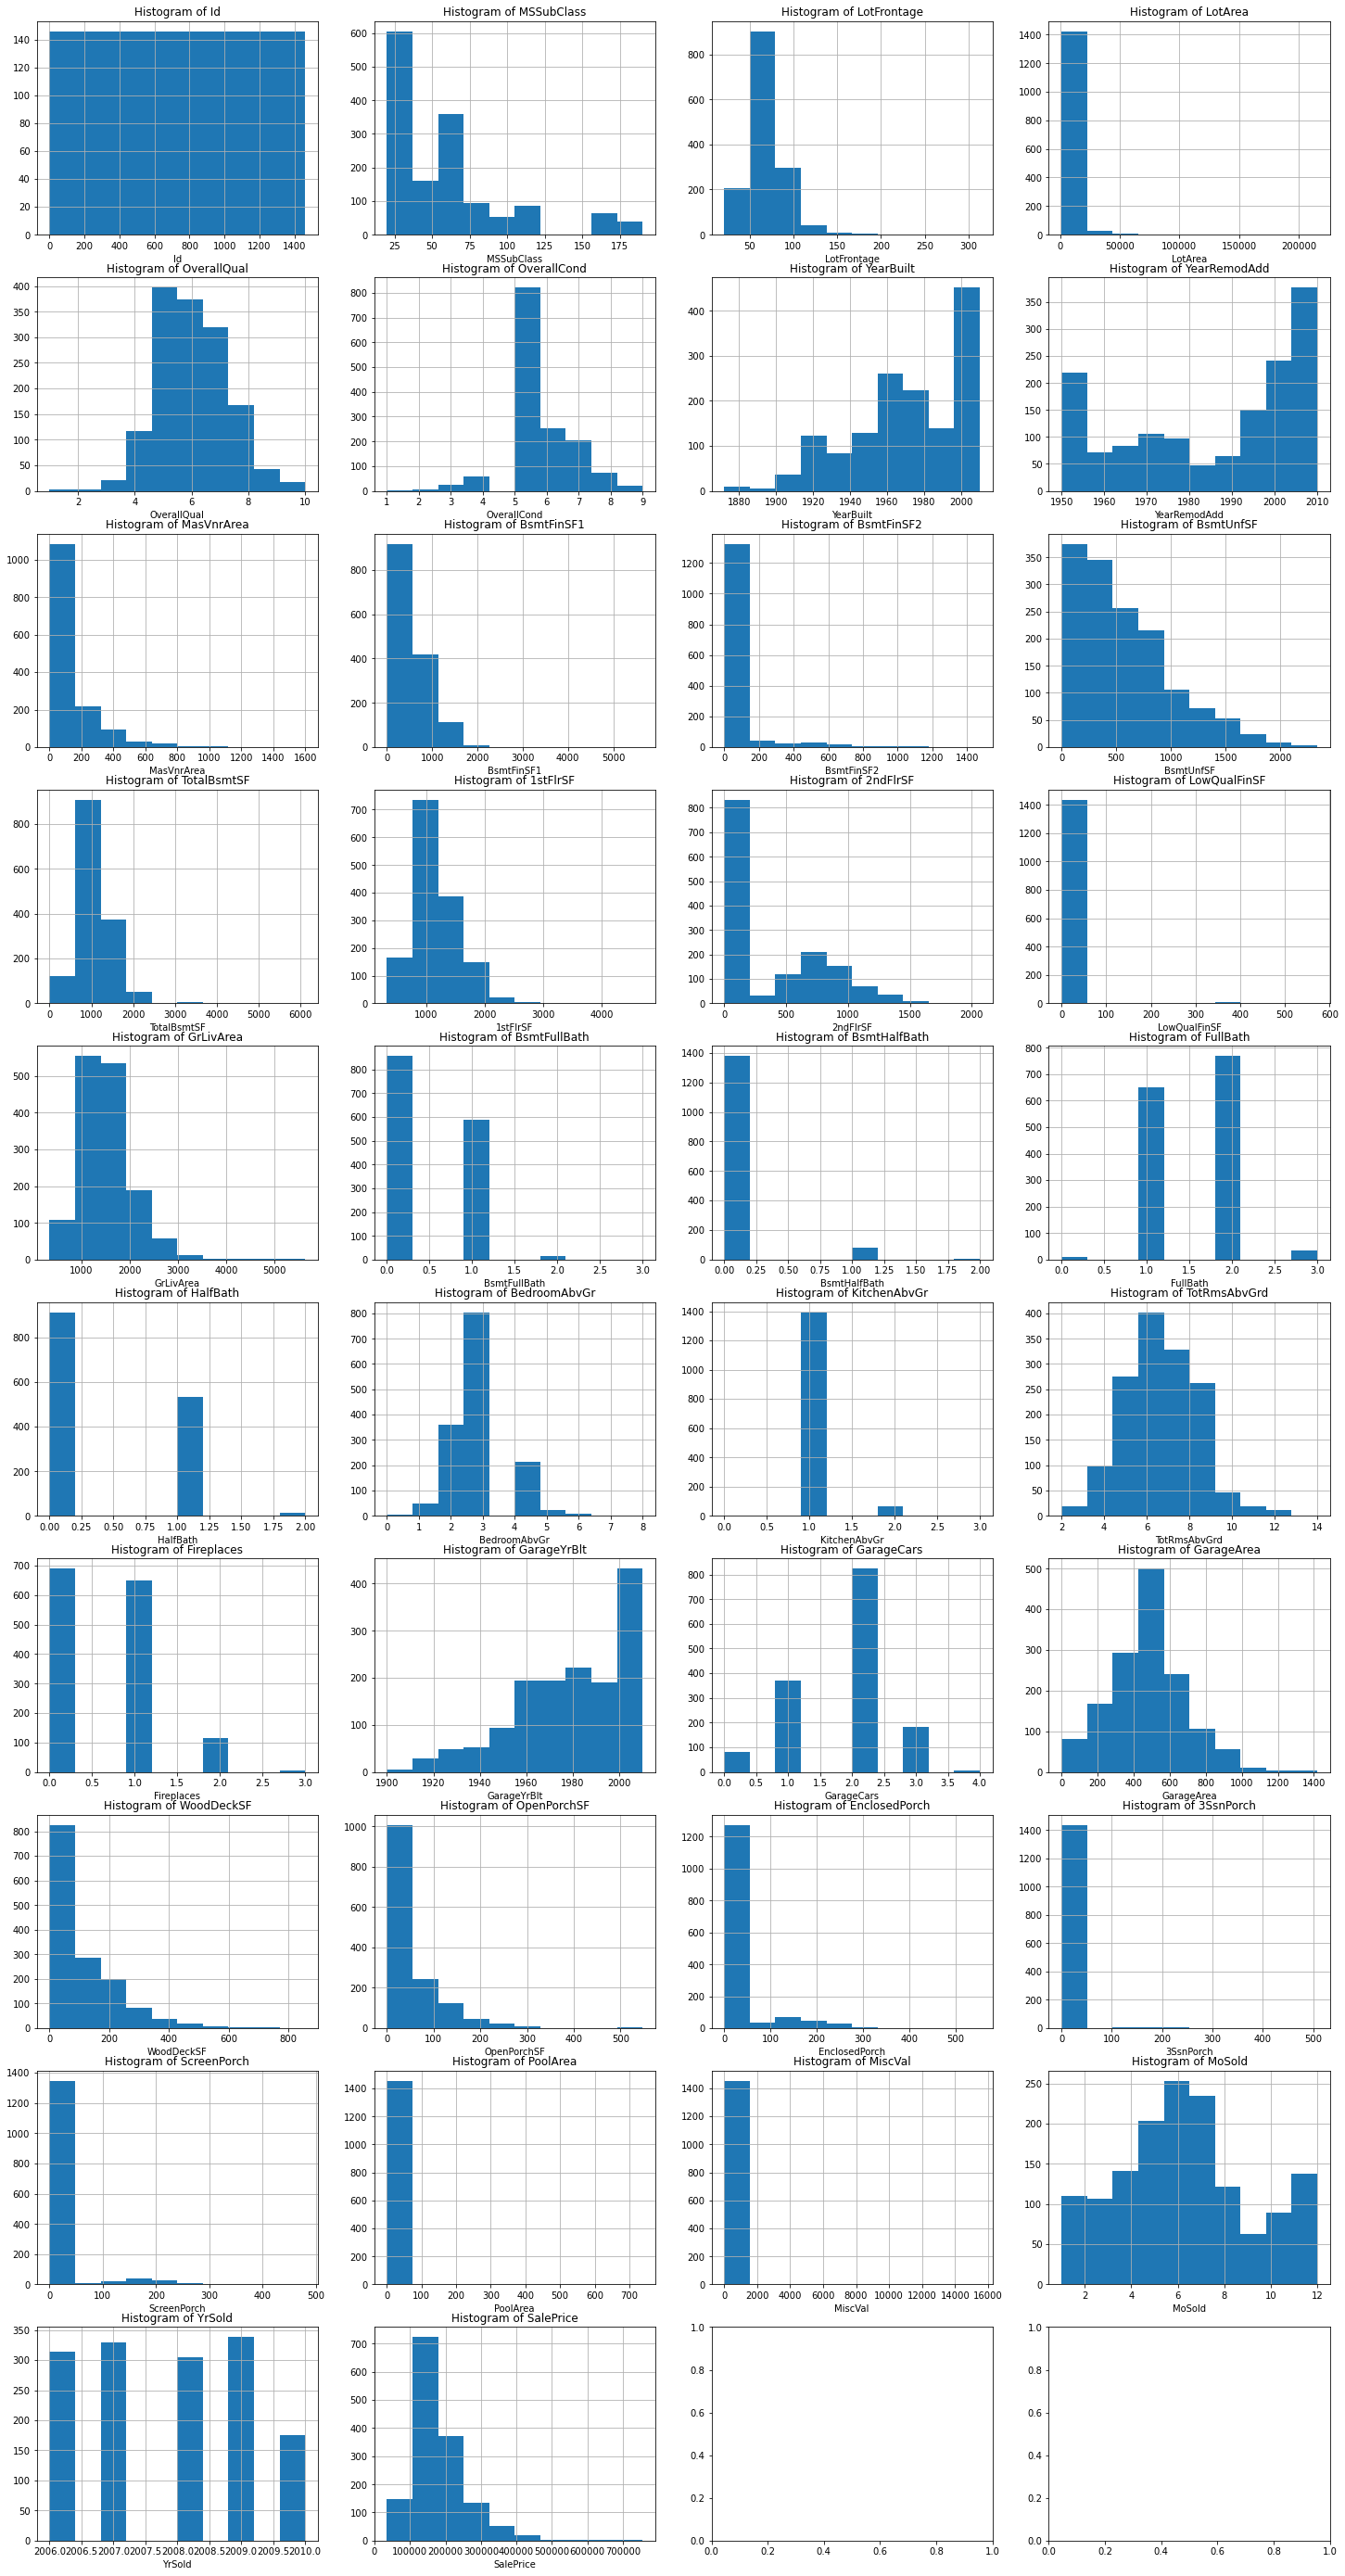

In [1114]:
ncols,nrows=10,4
fig3,ax3 = plt.subplots(nrows=10,ncols=4,sharey=False,figsize=(25, 50), squeeze=False)

for i,j in enumerate(non_object_columns):
    r,c = i//nrows,i%nrows
    ax3[r][c].hist(df[j])
    ax3[r][c].set(xlabel=j)
    ax3[r][c].set_title(f"Histogram of {j}")
    ax3[r][c].grid(True)


<p style='color:purple'>
<b> Observation </b> - We see there are some columns which has a particular dominating value. Columns such as MasVnrArea, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, KitchenAbvGr, EnclosedPorch, PoolArea, MiscVal
show such behaviour. Hence, we will drop these columns.
</p>

In [1115]:
cols_with_dominating_values = ['MasVnrArea','BsmtFinSF2','2ndFlrSF','LowQualFinSF','KitchenAbvGr','EnclosedPorch','PoolArea','MiscVal']
print(f"Shape of dataframe before dropping above variables {df.shape}")
df = df.drop(cols_with_dominating_values, axis=1)
print(f"Shape of dataframe after dropping above variables {df.shape}")



Shape of dataframe before dropping above variables (1460, 76)
Shape of dataframe after dropping above variables (1460, 68)


In [1116]:
print(f"Length of non_object_columns before dropping above variables  {len(non_object_columns)}")
non_object_columns = non_object_columns.drop(cols_with_dominating_values)
print(f"Length of non_object_columns after dropping above variables {len(non_object_columns)}")


Length of non_object_columns before dropping above variables  38
Length of non_object_columns after dropping above variables 30


## Step 6 - Checking Correlation

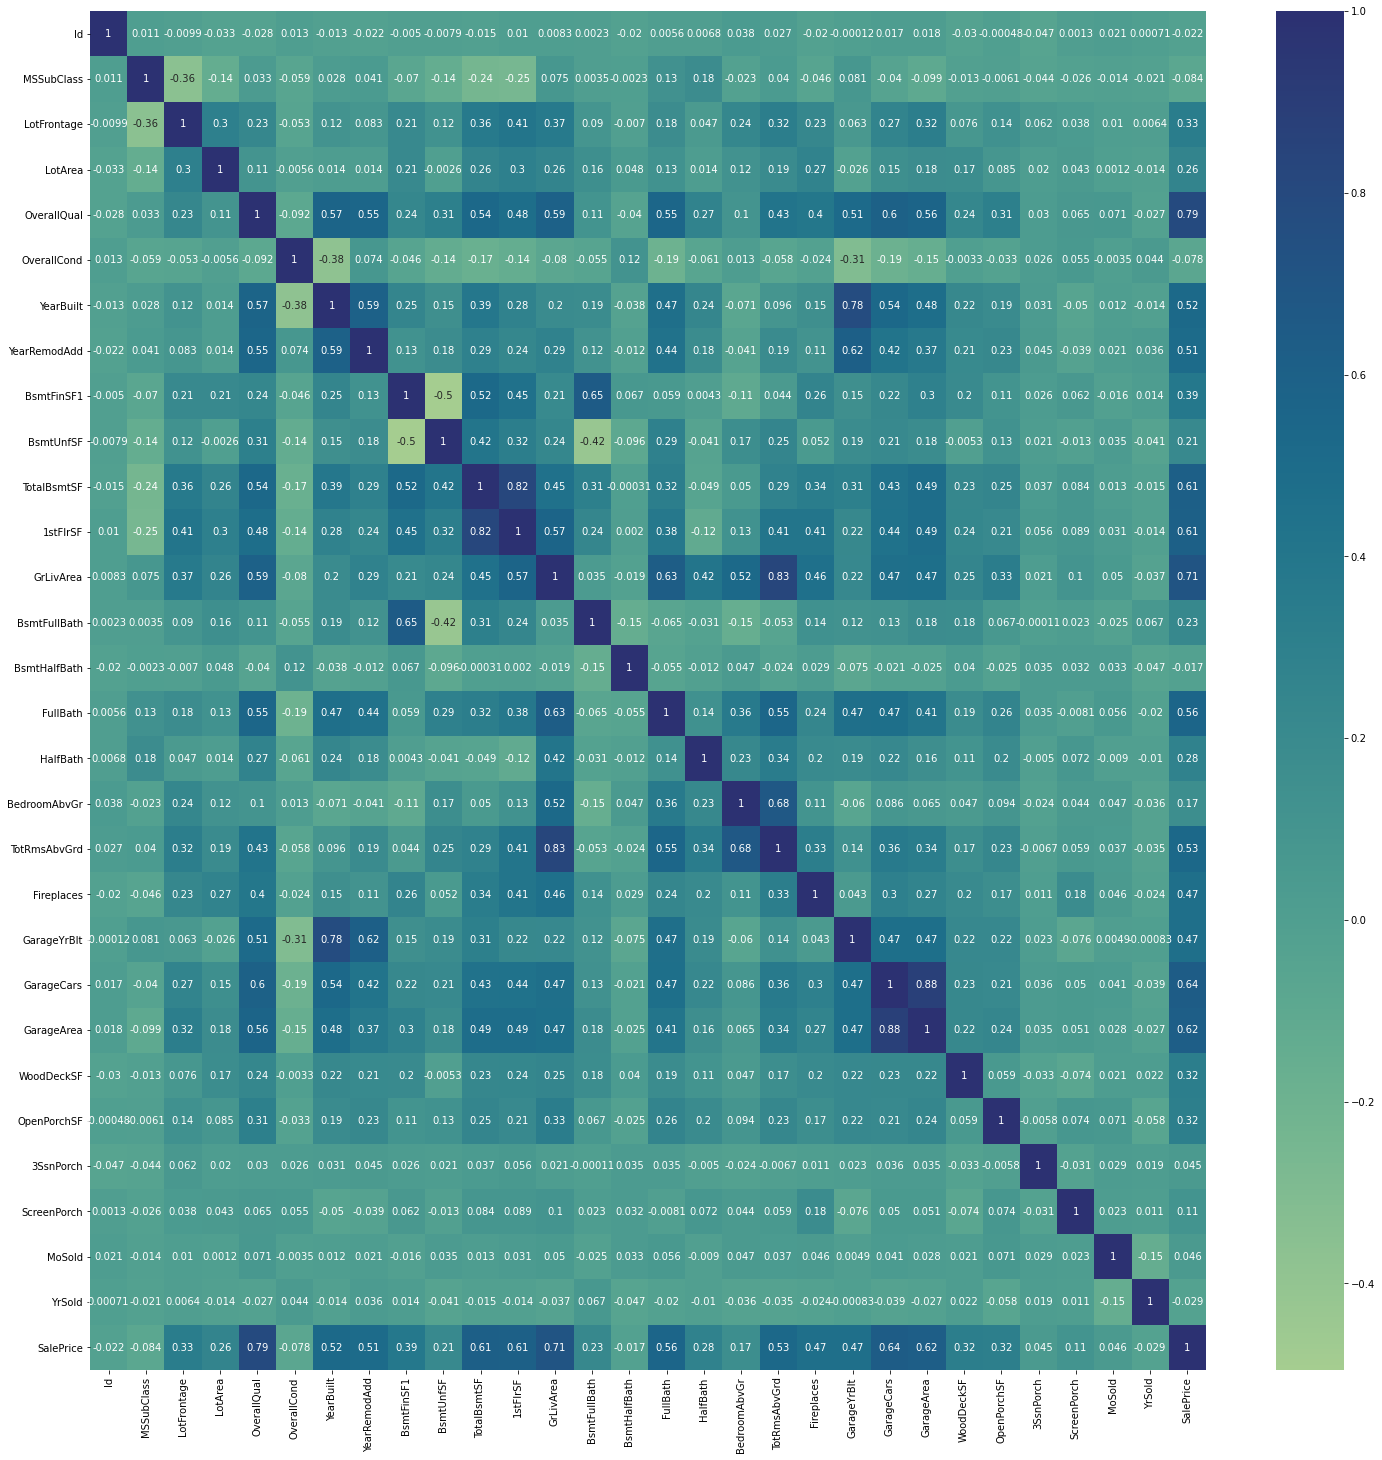

In [1117]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, cmap="crest")
plt.show()

<p style='color:purple'>
<b> Observation </b> - There seems to be good correlation between some variables. Let's identify variables with more than 85% correlation. 
</p>

In [1118]:
corr_matrix = df.corr().abs()


In [1119]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]



In [1120]:
to_drop

['GarageArea']

<p style='color:purple'>
<b> Observation </b> - We see the column `GarageArea` has huge correlation with the variable `GarageCars`.</br>
Before dropping this column, we will plot a scatter plot to understand the correlation better.
</p>

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

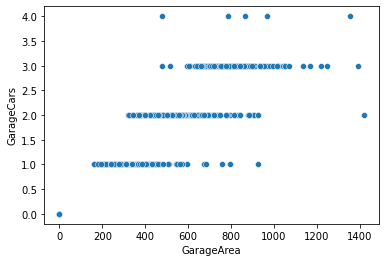

In [1121]:
sns.scatterplot(data=df,x=df['GarageArea'],y=df['GarageCars'])

<p style='color:purple'>
<b> Observation </b> - There seems to be a correlation but it's not very consisitent. We see many house has 2 cars irrespctive of area. Hence, we will not drop this column.
</p>

### Step 7 - Creating Dummy values

For categorical variables

In [1122]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[object_columns], drop_first=True)



In [1123]:
dummy1

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1124]:
dummy1.shape

(1460, 196)

In [1125]:
# Adding the results to the master dataframe
print(f"Shape of dataframe before adding dummy variables {df.shape}")
df = pd.concat([df, dummy1], axis=1)
print(f"Shape of dataframe after adding dummy variables {df.shape}")


Shape of dataframe before adding dummy variables (1460, 68)
Shape of dataframe after adding dummy variables (1460, 264)


In [1126]:
df = df.drop(object_columns,1)
print(f"Shape of dataframe after dropping categorical variables {df.shape}")

Shape of dataframe after dropping categorical variables (1460, 226)


<p style='color:purple'>
<b> Next Step </b> - Now that we have all the dummy variables in place. We will check if we have columns which has values onlky for some records. </br> 
These columns might not hold much value. Let's check if we have columns with less than 5 values and less than 10 values.
 </p>

In [1127]:
df.sum()[df.sum()<5]

Utilities_NoSeWa         1.0
LotConfig_FR3            4.0
Neighborhood_Blueste     2.0
Condition1_RRNe          2.0
Condition2_PosA          1.0
Condition2_PosN          2.0
Condition2_RRAe          1.0
Condition2_RRAn          1.0
Condition2_RRNn          2.0
RoofStyle_Shed           2.0
RoofMatl_Membran         1.0
RoofMatl_Metal           1.0
RoofMatl_Roll            1.0
Exterior1st_AsphShn      1.0
Exterior1st_BrkComm      2.0
Exterior1st_CBlock       1.0
Exterior1st_ImStucc      1.0
Exterior1st_Stone        2.0
Exterior2nd_AsphShn      3.0
Exterior2nd_CBlock       1.0
Exterior2nd_Other        1.0
ExterCond_Po             1.0
Foundation_Wood          3.0
BsmtCond_Po              2.0
Heating_OthW             2.0
Heating_Wall             4.0
HeatingQC_Po             1.0
Electrical_FuseP         3.0
Electrical_Mix           1.0
Functional_Sev           1.0
GarageQual_Po            3.0
SaleType_CWD             4.0
SaleType_Con             2.0
SaleType_Oth             3.0
SaleCondition_

In [1128]:
sum(df.sum()[df.sum()<5])

67.0

In [1129]:
df.sum()[(df.sum()<10) & (df.sum()>5)]

Neighborhood_NPkVill    9.0
Condition1_PosA         8.0
Condition2_Feedr        6.0
HouseStyle_2.5Fin       8.0
RoofStyle_Mansard       7.0
RoofMatl_WdShngl        6.0
Exterior2nd_Brk Cmn     7.0
Foundation_Stone        6.0
Heating_Grav            7.0
GarageType_CarPort      9.0
GarageCond_Gd           9.0
GarageCond_Po           7.0
SaleType_ConLD          9.0
dtype: float64

In [1130]:
sum(df.sum()[(df.sum()<10) & (df.sum()>5)])

98.0

<p style='color:purple'>
<b> Observation </b> - We see we have such columns.</p>

<p style='color:purple'>
<b> Next Step </b> - Such columns can be handled by below two approaches:</br>
    1. We drop these columns. This would result in loss of information.</br>
    2. We can combine these columns to create a new column. We will use this approach.</br></br>
Please note that we can use PCA as well in the preprocessing step to transform our dataset into a lower-dimensional space and then apply thresholding to identify and aggregate features. As per the scope of this project, we will refrain from using PCA. 
    </p>
    
    

In [1131]:
cols_less_than_5 = df.columns[df.sum()<5]
len(cols_less_than_5)

35

In [1132]:
cols_less_than_10 = df.columns[(df.sum()<10) & (df.sum()>5)]
len(cols_less_than_10)

13

In [1133]:
# Creating new columns

df['col_values_5'] = df[cols_less_than_5].sum(axis=1)
df['col_values_10'] = df[cols_less_than_10].sum(axis=1)


In [1134]:
# Let's validate the same
df[['col_values_5','col_values_10']].sum()

col_values_5     67
col_values_10    98
dtype: int64

In [1135]:
# Dropping remaining columns
print(f"Shape of dataframe before dropping variables {df.shape}")
df = df.drop(cols_less_than_5,axis=1)

print(f"Shape of dataframe after dropping columns with less than 5 values {df.shape}")
df = df.drop(cols_less_than_10,axis=1)

print(f"Shape of dataframe after dropping columns with less than 10 values {df.shape}")

Shape of dataframe before dropping variables (1460, 228)
Shape of dataframe after dropping columns with less than 5 values (1460, 193)
Shape of dataframe after dropping columns with less than 10 values (1460, 180)


## Step 9 - Train test split

In [1136]:
df.shape

(1460, 180)

In [1137]:
X = df.drop(['SalePrice','Id'],axis=1)
y = df['SalePrice']

In [1138]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7,test_size = 0.3,random_state = 100)

In [1139]:
print(f"Shape of train {X_train.shape} and test {y_train.shape}")
print(f"Shape of test {X_test.shape} and test {y_test.shape}")


Shape of train (1021, 178) and test (1021,)
Shape of test (438, 178) and test (438,)


## Step 10 - Feature Scaling 

<p style='color:purple'>
<b>Observation </b></br></br> 
In above data, we see that </br>
1. Some columns are in the range of single digit number. </br>
2. Other columns are continuous in nature. </br>
3. If we don't scale we will get into a situation where coefficients of these variables will also be very different. </br>
4. What would happen is that, values of coefficients of some variables would be much higher than that of other variables. </br>
5. Hence, it's important that all the variables are at a comparable scale such that all the coefficient are also at comparable scale. </br>
That's one advantage of scaling called as <b>Interpretability </b></br> 
6. Another advantage of re-scaling the numbers between 0 and 1 is that the <b>optimizations behind the scenes become much faster.</b> 
The gradient descent algorithm converges to find the optimal point to minimize the cost function. </br>
7. If all variables have same scale, the GD algo converges much faster. 
How do we scale? 1. Min-Max Scaling (Normalization); Between 0 and 1 2. Standardization(mean - 0, Sigma -1)
<p>

In [1140]:
non_object_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1141]:
len(non_object_columns)

30

In [1142]:
non_object_columns = non_object_columns.drop(['SalePrice','Id'])


In [1143]:
len(non_object_columns)

28

In [1144]:
type(non_object_columns)

pandas.core.indexes.base.Index

In [1145]:
cols_to_scale = list(non_object_columns)
len(cols_to_scale)

28

In [1146]:
scaler = StandardScaler()

X_train[non_object_columns] = scaler.fit_transform(X_train[cols_to_scale])

X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,col_values_5,col_values_10
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,0.043512,-0.374367,-0.430911,...,0,0,0,1,0,0,1,0,0,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.717033,0.390956,1.160345,-0.454644,0.621579,...,0,0,0,1,0,0,1,0,0,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.761296,0.171964,-0.712011,...,0,0,0,1,0,0,1,0,0,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.963574,-0.175904,-1.256778,...,0,0,0,1,0,0,1,0,0,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.963574,0.475233,-0.620490,...,0,0,0,1,0,0,1,0,0,0


## Step 11- Model Building 

In [1147]:

lr = LinearRegression()


In [1148]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,n_features_to_select=40)
# rfe = RFE(estimator=logreg,n_features_to_select=40,max_iter=50)


In [1149]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [1150]:
y_train=y_train.values.reshape(-1,1)


In [1151]:
rfe = rfe.fit(X_train,y_train)

In [1152]:
# rfe.support_
# list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [1153]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,

In [1154]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition2_Norm',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Unf', 'RoofMatl_Tar&Grv', 'Exterior1st_BrkFace',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'Heating_GasW', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Typ',
       'SaleCondition_Alloca'],
      dtype='object')

In [1155]:
len(col)

40

<p style='color:purple'> 
<b>Next Step </b> </br> 
Now that we have a list of supported columns, we will create couple of functions to facilitate model optimization. 
</br>
</p>


In [1156]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1157]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 1 - Initial model as per columns recommended by RFE

In [1158]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:37   Log-Likelihood:                -11987.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     980   BIC:                         2.426e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   2.2e+05 

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is 0.855 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. We have a situation where feature F1 has a very high coefficient and another feature F2 has a very high Variance Inflation Factor (VIF), there are a few considerations to take into account when deciding which feature to drop first. </p>

#### High coefficient vs. high VIF:

1. A high coefficient indicates that the feature has a strong association with the target variable, assuming all other features are held constant.
2. A high VIF indicates that the feature is highly correlated with other features in the model, which can lead to issues with multicollinearity.


#### Potential impact on the model:

1. Dropping the feature with a high coefficient may result in a larger decrease in the model's predictive performance, as you are removing a strong predictor.
2. Dropping the feature with a high VIF may help to reduce the multicollinearity issue and improve the stability of the model's coefficient estimates.

Generally, the recommended approach is to start with the feature that has the higher VIF, as multicollinearity can have a more detrimental impact on the model's performance and reliability. Addressing the multicollinearity issue first can lead to more stable and interpretable coefficient estimates.

However, it's important to consider the specific context of your problem and the relative importance of the two features. If the feature with the high coefficient is known to be a strong predictor based on domain knowledge, it may be worth investigating the reasons for the high VIF (e.g., exploring alternative feature engineering or transformation techniques) before deciding to drop it.

The decision should be made based on a careful evaluation of the model's performance, the feature importance, and the potential trade-offs between addressing multicollinearity and maintaining predictive power.
</br><p style='color:purple'> 
3. Based on above, we will eliminate the variable "ExterCond_TA"  because of very high VIF </p></br> 
</br></p>


### Model 2 - Removing "ExterCond_TA" variable

In [1159]:
col = col.drop(['ExterCond_TA'])
len(col)

39

In [1160]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:37   Log-Likelihood:                -11991.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     981   BIC:                         2.426e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.569e+05 

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is still 0.854 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. Based on above, we will eliminate the variable "MSZoning_RL"  because of very high VIF </p></br> 
</br></p>


### Model 3 - Removing "MSZoning_RL" variable

In [1161]:
col = col.drop(['MSZoning_RL'])
len(col)
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:                -11998.
No. Observations:                1021   AIC:                         2.407e+04
Df Residuals:                     982   BIC:                         2.427e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.977e+05 

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is still 0.853 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. Based on above, we will eliminate the variable "Condition2_Norm"  because of very high VIF </p>

### Model 4 - Removing "Condition2_Norm" variable

In [1162]:
col = col.drop(['Condition2_Norm'])
print(len(col))
build_model(col)
get_vif(col)

37
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:                -12001.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                     983   BIC:                         2.426e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.185e+

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is still 0.852 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. Based on above, we will eliminate the variable "LandContour_Lvl"  because of very high VIF </p>

### Model 5 - Removing "LandContour_Lvl" variable

In [1163]:
col = col.drop(['LandContour_Lvl'])
print(len(col))
build_model(col)
get_vif(col)

36
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:                -12016.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     984   BIC:                         2.429e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.462e+

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is still 0.851 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. Based on above, we will eliminate the variable "Functional_Typ"  because of very high VIF </p>

### Model 6 - Removing "Functional_Typ" variable

In [1164]:
col = col.drop(['Functional_Typ'])
print(len(col))
build_model(col)
get_vif(col)

35
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     985   BIC:                         2.429e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.575e+

<p style='color:purple'> 
<b>Observation </b> </br> 
1. R-square is still 0.846 which seems fine.</br> 
2. A number of variables still have high VIF, and very high positive and negative coefficients. </br>
3. Based on above, we will eliminate the variable "SaleCondition_Alloca", "ExterCond_Gd", "MSZoning_RH" and "LandContour_HLS"  because of very high p-value </p>

### Model 7 - Removing "SaleCondition_Alloca", "ExterCond_Gd", "MSZoning_RH" and "LandContour_HLS" variable

In [1165]:
col = col.drop(['SaleCondition_Alloca','ExterCond_Gd','MSZoning_RH','LandContour_HLS'])
print(len(col))
build_model(col)
get_vif(col)

31
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:                -12021.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     989   BIC:                         2.426e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.582e+

<p style='color:purple'> 
<b>Observation </b> </br> 
1. There are some coeeficients which are very high, still we will keep those.</br> 
2. R-Square seem to stabilised around 0.84, which is decent. </br>
3. As a next step, we will create a final model with final list of columns. </p>

### Model 8 - Final model with selected columns 

In [1166]:
lr_final = LinearRegression()
lr_final.fit(X_train[col],y_train)

LinearRegression()

In [1167]:
# lr_final.build_model(X_train,y_train)

In [1168]:
print(lr_final.intercept_,lr_final.coef_)
print(len(lr_final.coef_[0]))

[258169.61223235] [[ 19384.49340227  23794.1820586  -20718.83214632 -16220.30739788
  -24024.65550571  17824.40332252  24481.92282264 -17451.89509712
   66006.7725095   37177.76990276  35927.09739608  32778.06837431
   21817.98069611 -19489.45875353 -29011.84697431 -18026.28672159
  -22680.0207498  -22335.86315449  21575.29909052  18190.0590554
  -25049.80184445 -17985.41182931 -57550.90926535 -41981.88519542
  -54252.62001783  31350.63513139  21574.11874905 -55627.68135833
  -31626.06631637 -43884.13408129 -35725.30749308]]
31


In [1169]:
y_train_pred = lr_final.predict(X_train[col])

In [1170]:
len(y_train_pred)

1021

In [1171]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8422057124695603

#### Scaling X_test

In [1172]:
X_test[non_object_columns] = scaler.transform(X_test[non_object_columns])


In [1173]:
y_test=y_test.values.reshape(-1,1)


### Step 13 - Checking Metrics

In [1174]:
# Defining a function for performance metrics
def calc_performance(fy_train, fy_train_pred, fy_test, fy_test_pred):
    metric = []
    r2_train_lr = r2_score(fy_train, fy_train_pred)
    print(f"r2 train - {r2_train_lr}")
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(fy_test, fy_test_pred)
    print(f"r2 test - {r2_test_lr}")
    metric.append(r2_test_lr)
    
    rss1_lr = np.sum(np.square(fy_train - fy_train_pred))
    print(f"Residual Sum of Squares {rss1_lr}")
    metric.append(rss1_lr)
    
    rss2_lr = np.sum(np.square(fy_test - fy_test_pred))
    print(f"Residual Sum of Squares {rss2_lr}")
    metric.append(rss2_lr)
    
    mse_train_lr = mean_squared_error(fy_train, fy_train_pred)
    print(f"Mean Square Error {mse_train_lr}")
    metric.append(mse_train_lr**0.5)
    
    mse_test_lr = mean_squared_error(fy_test, fy_test_pred)
    print(f"Mean Square Error {mse_test_lr}")
    metric.append(mse_test_lr**0.5)
    
    return metric

In [1175]:
y_pred_train = lr_final.predict(X_train[col])
y_pred_test = lr_final.predict(X_test[col])

metric1 = calc_performance(y_train, y_pred_train, y_test, y_pred_test)


r2 train - 0.8422057124695603
r2 test - 0.8283780850173095
Residual Sum of Squares 1006837821009.8153
Residual Sum of Squares 483752842244.42725
Mean Square Error 986129109.7059895
Mean Square Error 1104458543.9370484


<p style='color:purple'> 
<b> Observation </b> </br> 
1. To reduce any possible complexity, we will use <b> Regularization </b>.
2. For Linear Regression model, ocmplexity depends on two things: [a.] Magnitude of coefficients and [b.] Number of coefficients </b>
3. Using reglarization, we add apenalty to the cost function. </b>
4. The penalty comprises a little on bias, but decreases the variance. </b>
5. And because we want our model to perform better on unseen data, without losing out on identifying the underlying patterns in data. Hence, we are ready to sacrifice a little bias for significant decrease in variation. <br>   

To being with we will use <b> L2 Regularization (Ridge)</b>
</p>



## Step 14 - L2 Regularization (Ridge) 

1. For Ridge, shrinkage penalty is squared sum of all model coefficients.  
2. Also, in Ridge Regression there is no feature selection. 

In [1176]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1177]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [1178]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[[ 22426.88882625  24288.36203454 -12229.19154801 -18045.20206084
  -16215.69215303  14993.45940955  19598.41030958 -16494.43863723
   56324.36773579  34941.05573258  25273.47804237  22178.74458233
   15692.93720516 -17005.38108053 -24953.99799194 -14429.09359126
  -15073.28256763 -12255.74278752  19179.54363366  12547.11810368
  -20329.7546076  -16461.94710333 -43610.3942205  -36055.26794073
  -46422.96952203  31283.95856825  11450.19126848 -42601.44304706
  -25654.40289867 -37519.30879188 -15723.14906119]]


In [1179]:
type(ridge.coef_)

numpy.ndarray

In [1180]:
ridge.coef_

array([[ 22426.88882625,  24288.36203454, -12229.19154801,
        -18045.20206084, -16215.69215303,  14993.45940955,
         19598.41030958, -16494.43863723,  56324.36773579,
         34941.05573258,  25273.47804237,  22178.74458233,
         15692.93720516, -17005.38108053, -24953.99799194,
        -14429.09359126, -15073.28256763, -12255.74278752,
         19179.54363366,  12547.11810368, -20329.7546076 ,
        -16461.94710333, -43610.3942205 , -36055.26794073,
        -46422.96952203,  31283.95856825,  11450.19126848,
        -42601.44304706, -25654.40289867, -37519.30879188,
        -15723.14906119]])

In [1181]:
type(lasso.coef_)

numpy.ndarray

In [1182]:
lasso.coef_

array([ 21413.62304642,  23756.57364384,  -7092.88812333, -17716.51166814,
       -10246.99414004,  12923.94086905,  19276.9387052 , -16214.14437115,
        61917.73074724,  34337.38698186,  21387.48723045,  21289.89458557,
        12362.29004652, -15610.17403301, -24868.82405556, -14192.81745244,
        -5591.5869263 ,   -418.31181888,  19039.35365942,   4714.08861322,
       -17066.84303981, -13162.58838644, -51199.73083191, -39138.02149387,
       -50243.26590671,  31193.33868868,   2863.90780458, -48858.91585919,
       -27753.32536283, -40499.80762359,     -0.        ])

In [1183]:
y_pred_train_ridge = ridge.predict(X_train[col])
y_pred_test_ridge = ridge.predict(X_test[col])

metric_ridge = calc_performance(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)

r2 train - 0.839239803285929
r2 test - 0.8277685329587192
Residual Sum of Squares 1025762394177.1703
Residual Sum of Squares 485470994269.8761
Mean Square Error 1004664440.9178945
Mean Square Error 1108381265.4563382


## Step 15 - L1 Regularization (Lasso) 

1. For Ridge, shrinkage penalty is absolute sum of all model coefficients.  
2. Also, in Lasso Regression there is feature selection. 

In [1184]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1185]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1186]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=100)

In [1187]:
lasso.coef_

array([ 21413.62304642,  23756.57364384,  -7092.88812333, -17716.51166814,
       -10246.99414004,  12923.94086905,  19276.9387052 , -16214.14437115,
        61917.73074724,  34337.38698186,  21387.48723045,  21289.89458557,
        12362.29004652, -15610.17403301, -24868.82405556, -14192.81745244,
        -5591.5869263 ,   -418.31181888,  19039.35365942,   4714.08861322,
       -17066.84303981, -13162.58838644, -51199.73083191, -39138.02149387,
       -50243.26590671,  31193.33868868,   2863.90780458, -48858.91585919,
       -27753.32536283, -40499.80762359,     -0.        ])

In [1188]:
y_pred_train_lasso = lasso.predict(X_train[col])
y_pred_test_lasso = lasso.predict(X_test[col])

metric_lasso = calc_performance(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)

r2 train - 0.8383981066087984
r2 test - 0.8283886334907408
Residual Sum of Squares 1.1833523852294686e+16
Residual Sum of Squares 2108774563525045.8
Mean Square Error 1009924590.7487376
Mean Square Error 1104390660.1145895


In [1189]:
comparison_matrix = pd.DataFrame({
    'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
    'Linear_Regression': metric,
    'L2-Ridge': metric_ridge,
    'L1-Lasso': metric_lasso
})

comparison_matrix

,Metric,Linear_Regression,L2-Ridge,L1-Lasso
0,R2 Score (Train),8.422057e-01,8.392398e-01,8.383981e-01
1,R2 Score (Test),8.283781e-01,8.277685e-01,8.283886e-01
2,RSS (Train),1.006838e+12,1.025762e+12,1.183352e+16
3,RSS (Test),4.837528e+11,4.854710e+11,2.108775e+15
4,MSE (Train),3.140269e+04,3.169644e+04,3.177931e+04
5,MSE (Test),3.323340e+04,3.329236e+04,3.323237e+04


## Step 16 - Comparing coefficients for Linear Regression along with Lasso and Ridge 


In [1190]:
coefficients = pd.DataFrame({"Columns":X[col].columns})
coefficients['Linear'] = lr_final.coef_[0]
coefficients['Ridge']= ridge.coef_[0]
coefficients['Lasso']= lasso.coef_
coefficients


,Columns,Linear,Ridge,Lasso
0,OverallQual,19384.493402,22426.888826,21413.623046
1,GrLivArea,23794.182059,24288.362035,23756.573644
2,MSZoning_FV,-20718.832146,-12229.191548,-7092.888123
3,MSZoning_RM,-16220.307398,-18045.202061,-17716.511668
4,LotShape_IR3,-24024.655506,-16215.692153,-10246.994140
5,LandContour_Low,17824.403323,14993.459410,12923.940869
6,Neighborhood_Crawfor,24481.922823,19598.410310,19276.938705
7,Neighborhood_Edwards,-17451.895097,-16494.438637,-16214.144371
8,Neighborhood_NoRidge,66006.772509,56324.367736,61917.730747
9,Neighborhood_NridgHt,37177.769903,34941.055733,34337.386982


In [1191]:
coefficients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Columns  31 non-null     object 
 1   Linear   31 non-null     float64
 2   Ridge    31 non-null     float64
 3   Lasso    31 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [1192]:
import pandas as pd

# Assume we have a DataFrame named 'df'
float_cols = [col for col in coefficients.columns if coefficients[col].dtype == 'float64']
object_cols = [col for col in coefficients.columns if coefficients[col].dtype == 'object']

# Create a new DataFrame with the absolute values of the float columns
df_abs = coefficients[float_cols].abs()

# Combine the original DataFrame and the new DataFrame with absolute values
df_result = pd.concat([pd.DataFrame({"Columns":X[col].columns}), df_abs], axis=1)



In [1193]:
df_result

,Columns,Linear,Ridge,Lasso
0,OverallQual,19384.493402,22426.888826,21413.623046
1,GrLivArea,23794.182059,24288.362035,23756.573644
2,MSZoning_FV,20718.832146,12229.191548,7092.888123
3,MSZoning_RM,16220.307398,18045.202061,17716.511668
4,LotShape_IR3,24024.655506,16215.692153,10246.994140
5,LandContour_Low,17824.403323,14993.459410,12923.940869
6,Neighborhood_Crawfor,24481.922823,19598.410310,19276.938705
7,Neighborhood_Edwards,17451.895097,16494.438637,16214.144371
8,Neighborhood_NoRidge,66006.772509,56324.367736,61917.730747
9,Neighborhood_NridgHt,37177.769903,34941.055733,34337.386982


## Step 17 - Model Evaluation using Residual Analysis

### Step 17.1 - Residual Analysis for Normal Linear Regression

/Users/pbaranwa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


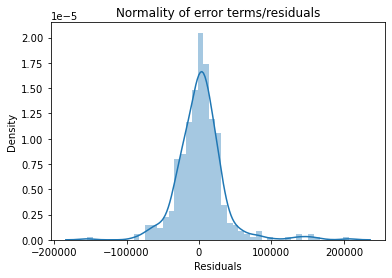

In [1194]:
y_res = y_test - y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

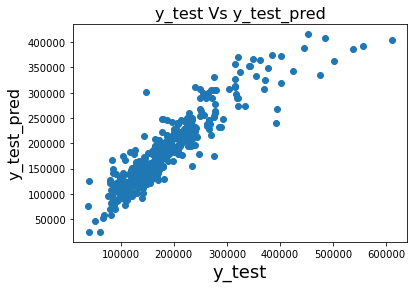

In [1195]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.title('y_test Vs y_test_pred', fontsize=16)  
plt.show()

### Step 17.2 - Residual Analysis for Ridge Regression

/Users/pbaranwa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


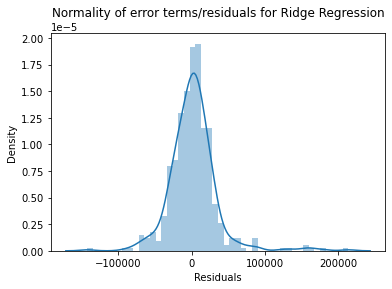

In [1196]:
y_res = y_test - y_pred_test_ridge
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals for Ridge Regression')
plt.xlabel("Residuals")
plt.show()

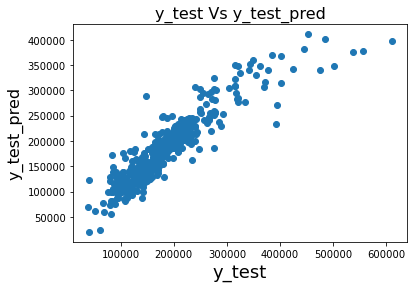

In [1197]:
plt.scatter(y_test,y_pred_test_ridge)
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.title('y_test Vs y_test_pred', fontsize=16)  
plt.show()

### Step 17.3 - Residual Analysis for Lasso Regression

/Users/pbaranwa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


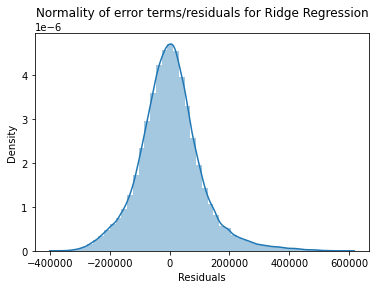

In [1198]:
y_res = y_test - y_pred_test_lasso
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals for Ridge Regression')
plt.xlabel("Residuals")
plt.show()

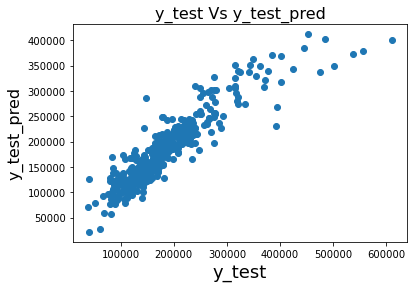

In [1199]:
plt.scatter(y_test,y_pred_test_lasso)
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.title('y_test Vs y_test_pred', fontsize=16)  
plt.show()

<p style='color:purple'> 
<b> Observation </b>  </p>
1. For all three residual plots, we see that the residuals are centered around zero. </br>
2. Scatter plot shows the predictions against actual values. 

## Step 18 - Answering below two questions.



Identifying top 10 variables based on coefficients

In [1200]:
for column in df_result.columns:
    if df_result[column].dtype == 'float64':
        print(f"Top 5 values in '{column}' column:")
        print(df_result.loc[df_result[column].sort_values(ascending=False).head(10).index])
    elif df_result['Columns'].dtype == 'object':
        print(f"The '{column}' column is of object data type and will be skipped.")

The 'Columns' column is of object data type and will be skipped.
Top 5 values in 'Linear' column:
                 Columns        Linear         Ridge         Lasso
8   Neighborhood_NoRidge  66006.772509  56324.367736  61917.730747
22           BsmtQual_Fa  57550.909265  43610.394221  51199.730832
27        KitchenQual_Fa  55627.681358  42601.443047  48858.915859
24           BsmtQual_TA  54252.620018  46422.969522  50243.265907
29        KitchenQual_TA  43884.134081  37519.308792  40499.807624
23           BsmtQual_Gd  41981.885195  36055.267941  39138.021494
9   Neighborhood_NridgHt  37177.769903  34941.055733  34337.386982
10  Neighborhood_Somerst  35927.097396  25273.478042  21387.487230
30       Functional_Maj2  35725.307493  15723.149061      0.000000
11  Neighborhood_StoneBr  32778.068374  22178.744582  21289.894586
Top 5 values in 'Ridge' column:
                 Columns        Linear         Ridge         Lasso
8   Neighborhood_NoRidge  66006.772509  56324.367736  61917.730747

##### Question 1 - Identify the variables which are significant in predicting the price of a house.
<p style='color:purple'> 
<b> Answer 1 - Based on all the three types of optimizations used, below are the top 10 most sigficant variables  </b> </br> 
</p>

1. Neighborhood_NoRidge 
2. BsmtQual_Fa 
3. BsmtQual_TA 
4. KitchenQual_Fa 
5. KitchenQual_TA 
6. BsmtQual_Gd 
7. Neighborhood_NridgHt 
8. BsmtExposure_Gd 
9. KitchenQual_Gd 
10. BldgType_Twnhs 




##### Question 2 - How well those variables describe the price of a house.
<p style='color:purple'> 
<b> Answer 2 - Based on the R-square, it seems that the regression model explains 84% of the total variation in the dependent variable (the target variable). Sharing metrics below. </b> </br> 
</p> 



In [1201]:
comparison_matrix

,Metric,Linear_Regression,L2-Ridge,L1-Lasso
0,R2 Score (Train),8.422057e-01,8.392398e-01,8.383981e-01
1,R2 Score (Test),8.283781e-01,8.277685e-01,8.283886e-01
2,RSS (Train),1.006838e+12,1.025762e+12,1.183352e+16
3,RSS (Test),4.837528e+11,4.854710e+11,2.108775e+15
4,MSE (Train),3.140269e+04,3.169644e+04,3.177931e+04
5,MSE (Test),3.323340e+04,3.329236e+04,3.323237e+04


## Questions to Answer
----------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------



#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?




#### Answer 1

The optimal `value of alpha for ridge and lasso regression is 4.0 and 100.0 respectively`. 

In [1202]:
# Retraining ridge regression using doubled alpha
alpha_ridge_revised = 8.0
ridge_v2 = Ridge(alpha=alpha_ridge_revised)
ridge_v2.fit(X_train[col], y_train)
y_pred_train_ridge_revised = ridge_v2.predict(X_train[col])
y_pred_test_ridge_revised = ridge_v2.predict(X_test[col])
metric_ridge_v2 = calc_performance(y_train, y_pred_train_ridge_revised, y_test, y_pred_test_ridge_revised)


r2 train - 0.8344913345032148
r2 test - 0.8244059682079764
Residual Sum of Squares 1056060943238.389
Residual Sum of Squares 494949097666.9094
Mean Square Error 1034339807.2853957
Mean Square Error 1130020770.929017


In [1203]:
# Retraining ridge regression using doubled alpha
alpha_lasso_revised = 200.0
lasso_v2 = Lasso(alpha=alpha_lasso_revised)
lasso_v2.fit(X_train[col], y_train)
y_pred_train_lasso_revised = lasso_v2.predict(X_train[col])
y_pred_test_lasso_revised = lasso_v2.predict(X_test[col])
metric_lasso_v2 = calc_performance(y_train, y_pred_train_lasso_revised, y_test, y_pred_test_lasso_revised)


r2 train - 0.8322910620952118
r2 test - 0.8221069573284228
Residual Sum of Squares 1.1705938013875188e+16
Residual Sum of Squares 2079486221032078.8
Mean Square Error 1048090321.9888899
Mean Square Error 1144815864.0194492


<p style="color:purple">
<b> Next Step </b> - We will compare performance metric of the Ridge and Lasso Regression with twice the value of alpha.
</p>

In [1204]:
comparison_matrix_v2 = pd.DataFrame({
    'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
    'Linear_Regression': metric,
    'L2-Ridge': metric_ridge,
    'L2-Ridge_Revised': metric_ridge_v2,
    'L1-Lasso': metric_lasso,
    'L1-Lasso_Revised': metric_lasso_v2
})

comparison_matrix_v2

,Metric,Linear_Regression,L2-Ridge,L2-Ridge_Revised,L1-Lasso,L1-Lasso_Revised
0,R2 Score (Train),8.422057e-01,8.392398e-01,8.344913e-01,8.383981e-01,8.322911e-01
1,R2 Score (Test),8.283781e-01,8.277685e-01,8.244060e-01,8.283886e-01,8.221070e-01
2,RSS (Train),1.006838e+12,1.025762e+12,1.056061e+12,1.183352e+16,1.170594e+16
3,RSS (Test),4.837528e+11,4.854710e+11,4.949491e+11,2.108775e+15,2.079486e+15
4,MSE (Train),3.140269e+04,3.169644e+04,3.216115e+04,3.177931e+04,3.237422e+04
5,MSE (Test),3.323340e+04,3.329236e+04,3.361578e+04,3.323237e+04,3.383513e+04


<p style="color:purple">
<b> Observation </b> - We see that the performance metrics are very close to each other, and there is very less difference.
</p>

<p style="color:purple">
<b> Next Step </b> - Let's check the most important predictor variables after the change is implemented
</p>

In [1205]:
coefficients_v2 = pd.DataFrame({"Columns":X[col].columns})
coefficients_v2['Linear'] = lr_final.coef_[0]
coefficients_v2['Ridge']= ridge.coef_[0]
coefficients_v2['Ridge_v2']= ridge_v2.coef_[0]
coefficients_v2['Lasso']= lasso.coef_
coefficients_v2['Lasso_v2']= lasso_v2.coef_
coefficients_v2

,Columns,Linear,Ridge,Ridge_v2,Lasso,Lasso_v2
0,OverallQual,19384.493402,22426.888826,24480.149094,21413.623046,23605.851918
1,GrLivArea,23794.182059,24288.362035,24665.236442,23756.573644,23841.342455
2,MSZoning_FV,-20718.832146,-12229.191548,-8517.549546,-7092.888123,-0.000000
3,MSZoning_RM,-16220.307398,-18045.202061,-18998.991305,-17716.511668,-19291.110947
4,LotShape_IR3,-24024.655506,-16215.692153,-12319.048251,-10246.994140,-0.000000
5,LandContour_Low,17824.403323,14993.459410,13228.650175,12923.940869,8920.093592
6,Neighborhood_Crawfor,24481.922823,19598.410310,16331.113343,19276.938705,14019.837279
7,Neighborhood_Edwards,-17451.895097,-16494.438637,-15678.657968,-16214.144371,-15275.762000
8,Neighborhood_NoRidge,66006.772509,56324.367736,49182.744357,61917.730747,56977.863151
9,Neighborhood_NridgHt,37177.769903,34941.055733,32923.251086,34337.386982,31490.845771


<p style="color:purple">
<b> Observation </b> - Now that we have all the coefficients for all features, we will compare coefficients. 
</p>

In [1206]:
coefficients_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Columns   31 non-null     object 
 1   Linear    31 non-null     float64
 2   Ridge     31 non-null     float64
 3   Ridge_v2  31 non-null     float64
 4   Lasso     31 non-null     float64
 5   Lasso_v2  31 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.6+ KB


In [1207]:
for column in coefficients_v2.columns:
    if coefficients_v2[column].dtype == 'float64':
        print(f"\n Top 10 features with '{column}' column:")
        print(coefficients_v2['Columns'].loc[coefficients_v2[column].sort_values(ascending=False).head(10).index])
    elif coefficients_v2['Columns'].dtype == 'object':
        print(f"The '{column}' column is of object data type and will be skipped.")

The 'Columns' column is of object data type and will be skipped.

 Top 10 features with 'Linear' column:
8     Neighborhood_NoRidge
9     Neighborhood_NridgHt
10    Neighborhood_Somerst
11    Neighborhood_StoneBr
25         BsmtExposure_Gd
6     Neighborhood_Crawfor
1                GrLivArea
12    Neighborhood_Veenker
18     Exterior1st_BrkFace
26            Heating_GasW
Name: Columns, dtype: object

 Top 10 features with 'Ridge' column:
8     Neighborhood_NoRidge
9     Neighborhood_NridgHt
25         BsmtExposure_Gd
10    Neighborhood_Somerst
1                GrLivArea
0              OverallQual
11    Neighborhood_StoneBr
6     Neighborhood_Crawfor
18     Exterior1st_BrkFace
12    Neighborhood_Veenker
Name: Columns, dtype: object

 Top 10 features with 'Ridge_v2' column:
8     Neighborhood_NoRidge
9     Neighborhood_NridgHt
25         BsmtExposure_Gd
1                GrLivArea
0              OverallQual
10    Neighborhood_Somerst
18     Exterior1st_BrkFace
11    Neighborhood_StoneBr


<p style="color:purple">
<b> Observation </b> - From above, we see that the selected features are still the same with lambda increased to twice the current value. 
</p>

----------------------------------------------------------------------------------------------------------------------------------------

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer 2

<p style='color:purple'>Based on the performance metrics below we will go ahead and choose Lasso Regression.</p>

1. R-Square of Lasso Regularization is better.
2. Residual Sum of Squares (RSS) Error of Lasso Regularization is less.
3. Mean Square Error (MSE) Error of Lasso Regularization is less.


In [1208]:
comparison_matrix_v2

,Metric,Linear_Regression,L2-Ridge,L2-Ridge_Revised,L1-Lasso,L1-Lasso_Revised
0,R2 Score (Train),8.422057e-01,8.392398e-01,8.344913e-01,8.383981e-01,8.322911e-01
1,R2 Score (Test),8.283781e-01,8.277685e-01,8.244060e-01,8.283886e-01,8.221070e-01
2,RSS (Train),1.006838e+12,1.025762e+12,1.056061e+12,1.183352e+16,1.170594e+16
3,RSS (Test),4.837528e+11,4.854710e+11,4.949491e+11,2.108775e+15,2.079486e+15
4,MSE (Train),3.140269e+04,3.169644e+04,3.216115e+04,3.177931e+04,3.237422e+04
5,MSE (Test),3.323340e+04,3.329236e+04,3.361578e+04,3.323237e+04,3.383513e+04


----------------------------------------------------------------------------------------------------------------------------------------

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer 3


In [1209]:
col = col.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtExposure_Gd','GrLivArea','OverallQual'])

In [1210]:
alpha =100
lasso_v3 = Lasso(alpha=alpha)
lasso_v3.fit(X_train_v2, y_train) 

Lasso(alpha=100)

In [1211]:
y_pred_train_v2 = lasso_v3.predict(X_train_v2)
y_pred_test_v2 = lasso_v3.predict(X_test_v2)
metric_lasso_revised = calc_performance(y_train, y_pred_train_v2, y_test, y_pred_test_v2)


r2 train - 0.6471685933037787
r2 test - 0.6258681675916171
Residual Sum of Squares 1.0536807120161056e+16
Residual Sum of Squares 2011838868803561.0
Mean Square Error 2205005811.091463
Mean Square Error 2407694255.7361526


In [1212]:
coeff_v2 = pd.DataFrame(index=X_train_v2.columns)
coeff_v2['Lasso_v2'] = lasso_v3.coef_
pd.set_option('display.max_rows', None)
coeff_v2.sort_values('Lasso_v2',ascending=False)

,Lasso_v2
Exterior2nd_ImStucc,31213.437918
Neighborhood_Crawfor,30602.654563
Exterior1st_BrkFace,28837.511065
Neighborhood_StoneBr,28199.785546
LandContour_Low,21364.557395
Neighborhood_Veenker,14407.205068
HouseStyle_2.5Unf,11002.072857
Heating_GasW,10146.443860
Neighborhood_Somerst,1585.204487
MSZoning_FV,-0.000000


<p style='color:purple'> 
Based on above value of coefficients, below are the 5 most sigficant variables </br> 
</p>

1. Exterior2nd_ImStucc
2. Neighborhood_Crawfor
3. Exterior1st_BrkFace
4. Neighborhood_StoneBr
5. LandContour_Low

----------------------------------------------------------------------------------------------------------------------------------------

**Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

#### Answer 4

To ensure that a linear regression model with L1/L2 regularization is robust and generalizable, you can consider the following approaches:

**Cross-Validation:** Perform cross-validation to assess the model's performance on unseen data. This involves splitting the dataset into training and validation/test sets, training the model on the training set, and evaluating its performance on the validation/test set. Cross-validation helps you estimate the model's true generalization performance and identify any potential overfitting or underfitting issues.

**Regularization Hyperparameter Tuning:** Carefully tune the regularization hyperparameters (lambda for L2 regularization or alpha for L1 regularization) using techniques like grid search or cross-validation. The appropriate choice of regularization strength can help strike a balance between model complexity and generalization.

**Overfitting:** If the regularization parameter is too low, the model may overfit the training data, leading to poor generalization performance on unseen data.

**Underfitting:** If the regularization parameter is too high, the model may become too simple and fail to capture the underlying patterns in the data, resulting in poor performance on both the training and unseen data.
Feature Selection: In addition to regularization, consider performing feature selection to identify the most relevant features for your model. This can help reduce the model complexity and improve generalization. Techniques like recursive feature elimination (RFE), LASSO regression, or PCA can be used for feature selection.

**Model Complexity Evaluation:** Assess the complexity of your model by evaluating metrics such as the number of features, the number of non-zero coefficients (in the case of LASSO), or the model's effective degrees of freedom. Aim to strike a balance between model complexity and generalization performance.

**Evaluation Metrics:** Use appropriate evaluation metrics to assess the model's performance, such as mean squared error (MSE), R-squared (R²), or mean absolute error (MAE). These metrics can provide insights into the model's fit and predictive capabilities on both the training and validation/test sets.

#### Regarding the implications of these approaches for the model's accuracy:

**Robust and Generalizable Model:** Implementing the above techniques can help ensure that your linear regression model is robust and generalizable, meaning that it can perform well on unseen data, not just the training data. This is crucial for real-world applications where the model needs to make accurate predictions on new, unseen instances.

**Improved Accuracy:** A well-tuned and regularized model that is robust and generalizable is more likely to achieve higher accuracy on both the training and unseen data. Overfitting can lead to high training accuracy but poor performance on new data, while underfitting can result in low accuracy on both training and unseen data. The right balance of model complexity and regularization can help maximize the model's predictive performance.

**Reduced Overfitting:** Regularization techniques like L1 (LASSO) and L2 (Ridge) can help prevent overfitting by introducing a penalty for model complexity. This encourages the model to learn a simpler, more generalizable representation of the data, leading to better performance on unseen instances.

**Interpretability:** Depending on the type of regularization used, the model may become more interpretable. For example, LASSO (L1 regularization) can result in sparse models, where only the most important features have non-zero coefficients, making it easier to understand the model's decision-making process.

In summary, ensuring that your linear regression model is robust and generalizable through techniques like cross-validation, regularization hyperparameter tuning, and feature selection can significantly improve the model's accuracy and generalization performance, which is crucial for real-world applications.

----------------------------------------------------------------------------------------------------------------------------------------
